# Importing Libraries

In [248]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import r2_score as r
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import Normalizer

# Knocking 10 % data

In [249]:
# we have used if else loop to avoid further knocking if it is alraedy done once
if df_ori['X1'].isnull().sum() == 0:
    for i in range(1,9):
        df_ori[f'X{i}'] = df_ori[f'X{i}'].sample(frac = 0.9)
else:
    print("knocking already done")

##### Creating a knocked data .csv file

In [250]:
df_ori.to_csv('knocked_0.csv',sep=',', index = False, mode = 'w', header = True)

### Reading csv

In [251]:
df = pd.read_csv("knock_0.csv")
df_ori= pd.read_excel("ENB2012_data.xlsx")

## Correlation matrix for original data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


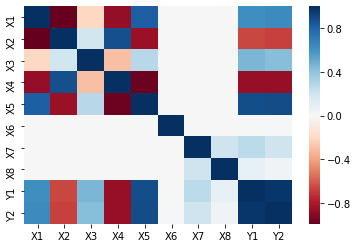

In [252]:
corrmat = df_ori.corr()
# to find the correlation matrix for features only
display(corrmat)

# also we can find the heatmap to get better visual idea
sns.heatmap(corrmat, xticklabels = corrmat.columns, yticklabels = corrmat.columns, cmap = 'RdBu')

# Doing Imputations

# X1 Imputation

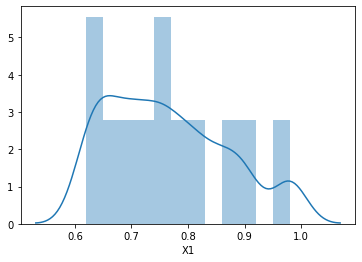

In [255]:
X1_ori = df_ori.X1
X1 = df.X1
sns.distplot(X1_ori)

In [256]:
X1_ori.describe()

count    768.000000
mean       0.764167
std        0.105777
min        0.620000
25%        0.682500
50%        0.750000
75%        0.830000
max        0.980000
Name: X1, dtype: float64

In [257]:
X1_ori.value_counts()

0.90    64
0.79    64
0.71    64
0.66    64
0.98    64
0.64    64
0.86    64
0.76    64
0.74    64
0.82    64
0.62    64
0.69    64
Name: X1, dtype: int64

#### filling with mean = 0.74 as standard deviation is less and all values have equal frequencies

In [258]:
m = 0.74
X1_fill = X1.fillna(0)
X1_fill = np.array(X1_fill)
X1_imp = []
for i in range(len(X1_fill)):
    if X1_fill[i] == 0:
        X1_imp.append(m)
    else:
        X1_imp.append(X1_fill[i])

In [259]:
tr1 = 0
fa1 = 0
for i in range(len(X1_ori)):
    if X1_ori[i] == X1_imp[i]:
        tr1 = tr1 + 1
    else:
        fa1 = fa1 + 1

In [260]:
accuracy = tr1/768
print(f"Accuracy compared to original feature is {accuracy}")

Accuracy compared to original feature is 0.9114583333333334


# X2 Imputation

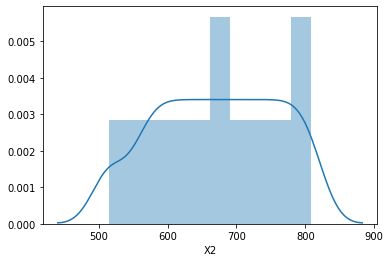

In [261]:
X2_ori = df_ori.X2
X2 = df.X2
sns.distplot(X2_ori)

In [262]:
X2_ori.describe()

count    768.000000
mean     671.708333
std       88.086116
min      514.500000
25%      606.375000
50%      673.750000
75%      741.125000
max      808.500000
Name: X2, dtype: float64

In [263]:
X2_ori.value_counts()

563.5    64
735.0    64
686.0    64
637.0    64
808.5    64
514.5    64
759.5    64
710.5    64
661.5    64
612.5    64
784.0    64
588.0    64
Name: X2, dtype: int64

In [264]:
m = 661.5
X2_fill = X2.fillna(0)
X2_fill = np.array(X2_fill)
X2_imp = []
for i in range(len(X2_fill)):
    if X2_fill[i] == 0:
        X2_imp.append(m)
    else:
        X2_imp.append(X2_fill[i])

In [265]:
tr2 = 0
fa2 = 0
for i in range(len(X2_ori)):
    if X2_ori[i] == X2_imp[i]:
        tr2 = tr2 + 1
    else:
        fa2 = fa2 + 1

In [266]:
accuracy = tr2/768
print(f"Accuracy compared to original feature is {accuracy}")

Accuracy compared to original feature is 0.9140625


# X3 Imputation

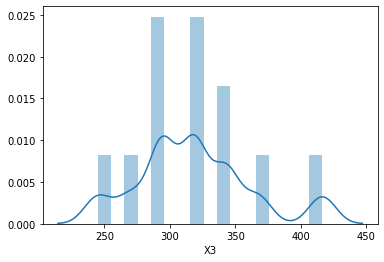

In [267]:
X3_ori = df_ori.X3
X3 = df.X3
sns.distplot(X3_ori)

In [268]:
X3_ori.describe()

count    768.000000
mean     318.500000
std       43.626481
min      245.000000
25%      294.000000
50%      318.500000
75%      343.000000
max      416.500000
Name: X3, dtype: float64

In [269]:
X3_ori.value_counts()

318.5    192
294.0    192
343.0    128
367.5     64
245.0     64
269.5     64
416.5     64
Name: X3, dtype: int64

#### We filled the null values with mean, as mean = mode = 318.5

In [270]:
m = X3_ori.mean()
X3_fill = X3.fillna(0)
X3_fill = np.array(X3_fill)
X3_imp = []
for i in range(len(X3_fill)):
    if X3_fill[i] == 0:
        X3_imp.append(m)
    else:
        X3_imp.append(X3_fill[i])

In [271]:
tr3 = 0
fa3 = 0
for i in range(len(X3_ori)):
    if X3_ori[i] == X3_imp[i]:
        tr3 = tr3 + 1
    else:
        fa3 = fa3 + 1

In [272]:
accuracy = tr3/768
print(f"Accuracy compared to original feature is {accuracy}")

Accuracy compared to original feature is 0.9205729166666666


# X4 imputation

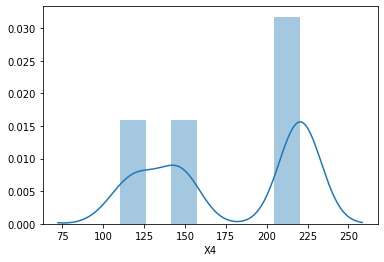

In [273]:
X4_ori = df_ori.X4
X4 = df.X4
sns.distplot(X4_ori)

In [274]:
X4_ori.value_counts()

220.50    384
147.00    192
122.50    128
110.25     64
Name: X4, dtype: int64

#### since 50% data of the X4_ori is 220.50 = mode, so we will fill null values with mode

In [275]:
m = X4_ori.mean()
X4_fill = X4.fillna(0)
X4_fill = np.array(X4_fill)
X4_imp_mean = []
for i in range(len(X4_fill)):
    if X4_fill[i] == 0:
        X4_imp_mean.append(m)
    else:
        X4_imp_mean.append(X4_fill[i])

In [276]:
tr41 = 0
fa41 = 0
for i in range(len(X4_ori)):
    if X4_ori[i] == X4_imp_mean[i]:
        tr41 = tr41 + 1
    else:
        fa41 = fa41 + 1

In [277]:
accuracy = tr41/768
print(f"Accuracy compared to original feature is {accuracy}")

Accuracy compared to original feature is 0.8997395833333334


In [278]:
m = 220.5
X4_fill = X4.fillna(0)
X4_fill = np.array(X4_fill)
X4_imp = []
for i in range(len(X4_fill)):
    if X4_fill[i] == 0:
        X4_imp.append(np.float(m))
    else:
        X4_imp.append(np.float(X4_fill[i]))

In [279]:
tr4 = 0
fa4 = 0
for i in range(len(X4_ori)):
    if X4_ori[i] == X4_imp[i]:
        tr4 = tr4 + 1
    else:
        fa4 = fa4 + 1

In [280]:
accuracy = tr4/768
print(f"Accuracy compared to original feature is {accuracy}")

Accuracy compared to original feature is 0.9557291666666666


# X5 imputation

#### here instaed of imputing by any machine learning technique, we are imputing such that it will fill the value of preceeding cell in place of null value as it has only two values so can be treated as a class

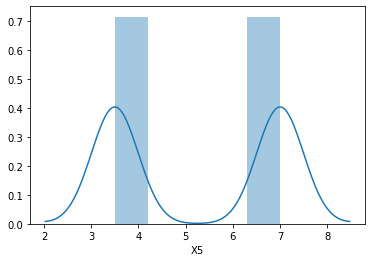

In [281]:
X5_ori = df_ori.X5
X5 = df.X5
sns.distplot(X5_ori)

In [282]:
X5_imp = []
X5_fill = X5.fillna(0)
X5_fill = np.array(X5_fill)
for i in range(len(X5_fill)):
    if X5_fill[i] == 0:
        X5_imp.append(X5_fill[i-1])
    else:
        X5_imp.append(X5_fill[i])

In [283]:
# Encoding
X5_ori_enc = 2 * X5_ori
X5_imp_enc = 2 * X5_imp

In [284]:
tr5 = 0
fa5 = 0
for i in range(len(X5_ori)):
    if np.int(X5_ori[i]) == np.int(X5_imp[i]):
        tr5 = tr5 + 1
    else:
        fa5 = fa5 + 1

In [285]:
print(f"Accuracy compared to original feature is {tr5/768}")

Accuracy compared to original feature is 0.9856770833333334


# X6 imputation

#### here instaed of imputing by any machine learning technique, we are imputing such that it will fill the value of preceeding cell in place of null value as it is a class

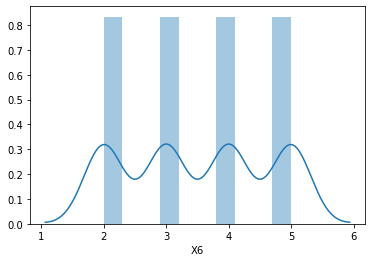

In [286]:
X6_ori = df_ori.X6
X6 = df.X6
sns.distplot(X6_ori)

In [287]:
X6_fill = X6.fillna(6)
X6_fill = np.array(X6_fill)
X6_imp = []
for i in range(len(X6_fill)):
    if X6_fill[i] == 6:
        X6_imp.append(X6_fill[i-4])
    else:
        X6_imp.append(X6_fill[i])

In [288]:
cm(X6_imp, X6_ori)

array([[190,   0,   0,   0,   0],
       [  0, 192,   0,   0,   0],
       [  0,   0, 190,   0,   0],
       [  0,   0,   0, 191,   0],
       [  2,   0,   2,   1,   0]], dtype=int64)

In [289]:
print(f"Accuracy compared to original feature is {asc(X6_ori, X6_imp)}")

Accuracy compared to original feature is 0.9934895833333334


# X7 imputation

#### here also instaed of imputing by any machine learning technique, we are imputing such that it will fill the value of preceeding cell in place of null value as it has only 4 values and can be treated as a class

count    768.000000
mean       0.234375
std        0.133221
min        0.000000
25%        0.100000
50%        0.250000
75%        0.400000
max        0.400000
Name: X7, dtype: float64

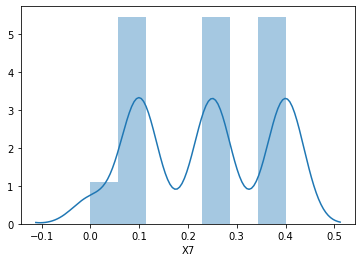

In [290]:
X7_ori = df_ori.X7
X7 = df.X7
sns.distplot(X7_ori)
X7_ori.describe()

In [291]:
X7_fill = X7.fillna(6)
X7_fill = np.array(X7_fill)
X7_imp = []
for i in range(len(X7_fill)):
    if X7_fill[i] == 6:
        X7_imp.append(X7_fill[i-1])
    else:
        X7_imp.append(X7_fill[i])

In [292]:
tr = 0
fa = 0
for i in range(len(X7_ori)):
    if np.int(X7_ori[i]) == np.int(X7_imp[i]):
        tr = tr + 1
    else:
        fa = fa + 1

In [293]:
accuracy = tr/768
print(f"Accuracy compared to original feature is {accuracy}")

Accuracy compared to original feature is 0.9869791666666666


# X8 imputation

#### here also instaed of imputing by any machine learning technique, we are imputing such that it will fill the value of preceeding cell in place of null value as it is a class

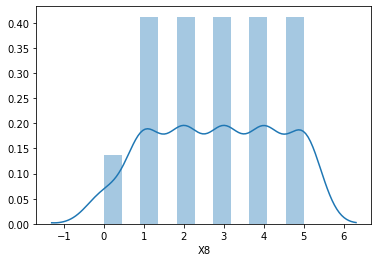

In [294]:
X8_ori = df_ori.X8
X8 = df.X8
sns.distplot(X8_ori)

In [295]:
X8_fill = X8.fillna(6)
X8_fill = np.array(X8_fill)
X8_imp = []
for i in range(len(X8_fill)):
    if X8_fill[i] == 6:
        X8_imp.append(X8_fill[i-1])
    else:
        X8_imp.append(X8_fill[i])

In [296]:
cm(X8_imp, X8_ori)

array([[ 48,   0,   0,   0,   0,   0,   0],
       [  0, 144,   0,   0,   0,   0,   0],
       [  0,   0, 144,   1,   0,   0,   0],
       [  0,   0,   0, 138,   1,   0,   0],
       [  0,   0,   0,   0, 142,   0,   0],
       [  0,   0,   0,   0,   0, 144,   0],
       [  0,   0,   0,   5,   1,   0,   0]], dtype=int64)

In [297]:
print(f"Accuracy compared to original feature is {asc(X8_imp, X8_ori)}")

Accuracy compared to original feature is 0.9895833333333334


In [298]:
dict = {'X1': X1_imp, 'X2': X2_imp, 'X3': X3_imp, 'X4': X4_imp, 'X5': X5_imp, 'X6': X6_imp, 'X7': X7_imp, 'X8': X8_imp, 'Y1': df_ori.Y1, 'Y2': df_ori.Y2}
df_imp = pd.DataFrame(dict)
df_imp.to_csv('imputed_data_simple.csv', index = False, mode = 'w', header = True)

# Reading imputed data

In [299]:
df = pd.read_csv('imputed_data_simple.csv')
Y1 = df.iloc[:,8].values  # Y1 is heating load
Y2 = df.iloc[:,9].values  # Y2 is cooling load
X = df.iloc[:,[0,1,2,3, 4, 5, 6, 7]].values

# VIF for imputed data

In [300]:
# Finding the VIF for all the features
VX = sm.tools.add_constant(df)
#create series for both
series = pd.Series([variance_inflation_factor(VX.values, i) for i in range(VX.shape[1])],index = VX.columns)
print('VIF DATA')
print('-'*100)
display(series)

VIF DATA
----------------------------------------------------------------------------------------------------


const    1402.521983
X1          5.491314
X2          6.513736
X3          2.576616
X4          4.996355
X5          6.821018
X6          1.014001
X7          1.024634
X8          1.071561
Y1         24.293891
Y2         22.680645
dtype: float64

## Splitting in training and testing sets for heating load

In [301]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X, Y1, test_size=0.2, random_state = 0 )

## Splitting in training and testing sets for Cooling load

In [302]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X, Y2, test_size=0.2, random_state = 0)

# Can we reduce data ???

In [303]:
pca = PCA(n_components = 1)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.76878787])

In [304]:
## Trying to reduce after normalizing
X_norm = Normalizer().fit_transform(X)
X_reduced = pca.fit_transform(X_norm)
pca.explained_variance_ratio_

array([0.87651375])

###### still the variance explained is very less so we can not reduce the data

# Model Fitting imputed Data

# 1) KNN regressor

###### for heating data

In [305]:
from sklearn.model_selection import cross_val_score
scores_knn=[]
k_red1=[]
for i in range(30):
    regr_heat_KNN = KNN(n_neighbors = i+1)
    scores1 = cross_val_score(regr_heat_KNN,X, Y1,cv=10)
    scores_knn.append(scores1.mean())
    k_red1.append(i+1)

Thus maximum Cross_val_score = 0.8549001303838498 is for k = 3 for heating load .


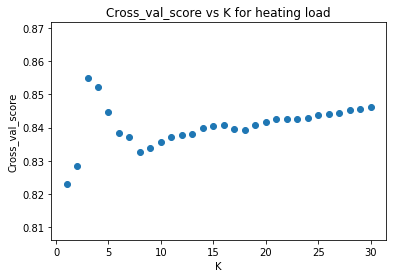

In [306]:
plt.scatter(k_red1,scores_knn )
plt.xlabel("K")
plt.ylabel("Cross_val_score")
plt.title("Cross_val_score vs K for heating load")
print(f'Thus maximum Cross_val_score = {scores_knn[scores_knn.index(np.max(scores_knn))]} is for k = {scores_knn.index(np.max(scores_knn)) + 1} for heating load .')

###### For cooling data

In [308]:
scores_knn1=[]
k_red2=[]
for i in range(30):
    regr_cool_KNN = KNN(n_neighbors = i+1)
    scores1 = cross_val_score(regr_cool_KNN,X, Y2,cv=10)
    scores_knn1.append(scores1.mean())
    k_red2.append(i+1)

Thus maximum Cross_val_score = 0.8960873927099087 is for k = 3 for cooling load .


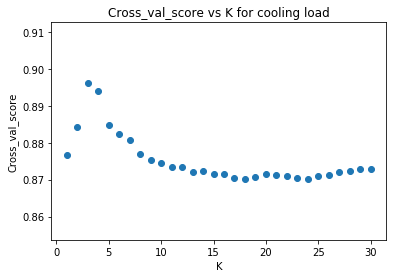

In [309]:
plt.scatter(k_red2,scores_knn1 )
plt.xlabel("K")
plt.ylabel("Cross_val_score")
plt.title("Cross_val_score vs K for cooling load")
print(f'Thus maximum Cross_val_score = {scores_knn1[scores_knn1.index(np.max(scores_knn1)) ]} is for k = {scores_knn1.index(np.max(scores_knn1)) + 1} for cooling load .')

In [310]:
# fitting KNN for both with optimum K
Reg_heat_KNN = KNN(n_neighbors =scores_knn.index(np.max(scores_knn)) + 1)
Reg_heat_KNN.fit(X1_train,y1_train)

Reg_cool_KNN = KNN(n_neighbors = scores_knn.index(np.max(scores_knn)) + 1)
Reg_cool_KNN.fit(X2_train,y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

###### Accuracy for both

In [313]:
print(f'Accuracy for heating data model is {Reg_heat_KNN.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_KNN.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.8920060777732547
Accuracy for cooling data model is 0.9179193677837663


###### RMSE value

In [314]:
import math
from sklearn.metrics import r2_score
Y1_predict = Reg_heat_KNN.predict(X1_test)
Y2_predict = Reg_cool_KNN.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 3.4533123463735746
Cooling RMSE: 2.7785143626571487


###### r2_score

In [315]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.8920060777732547
Cooling r2_score: 0.9179193677837663


###### Cross_val_score

In [316]:
# For heating load
from sklearn.model_selection import cross_val_score
Regr_heat_KNN = KNN(n_neighbors = 4)
scores1 = cross_val_score(Regr_heat_KNN,X1_test, y1_test,cv=10)
print(f'Cross val score of KNN with Heating Load: {scores1.mean()}')

# For cooling load
Regr_cool_KNN = KNN(n_neighbors = 4)
scores2 = cross_val_score(Regr_cool_KNN,X2_test, y2_test,cv=10)
print(f'Cross val score of KNN with Cooling Load: {scores2.mean()}')

Cross val score of KNN with Heating Load: 0.8488452584944302
Cross val score of KNN with Cooling Load: 0.8666014306202905


# 2) Decision Tree Regressor

###### For heating data

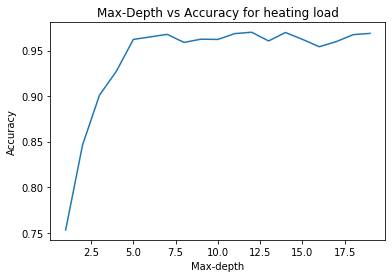

maximum accuracy is 0.9700568016312152 for depth with 12


In [317]:
#By changing the max_depth
acu11 = []
dep1 =[]
for i in range(1,20):

    reg_dt11 = DTR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X1_train,y1_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X1_test)
    dep1.append(i)
    acu11.append(r2(y1_test, y11_pred))
plt.plot(dep1,acu11)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu11)
index = acu11.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for depth with {dep1[index]}")

In [318]:
# since maximum accuracy is with optimum depth
Reg_heat_DTR = DTR(max_depth = dep1[index])
Reg_heat_DTR.fit(X1_train,y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

###### For cooling data

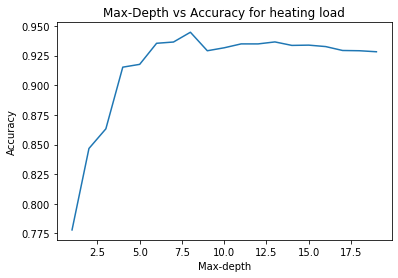

maximum accuracy is 0.9446250623049983 for split with 8


In [319]:
#By changing the max_depth
acu21 = []
dep2 =[]
for i in range(1,20):

    reg_dt11 = DTR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X2_train,y2_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X2_test)
    dep2.append(i)
    acu21.append(r2(y2_test, y11_pred))
plt.plot(dep2,acu21)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu21)
index = acu21.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep2[index]}")

In [320]:
# since maximum accuracy is with optimum depth
Reg_cool_DTR = DTR(max_depth = dep2[index])
Reg_cool_DTR.fit(X2_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

###### Accuracy for both

In [321]:
print(f'Accuracy for heating data model is {Reg_heat_DTR.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_DTR.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.9631390755153755
Accuracy for cooling data model is 0.9371064772227665


###### RMSE value

In [322]:
Y1_predict = Reg_heat_DTR.predict(X1_test)
Y2_predict = Reg_cool_DTR.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 2.0175268151664865
Cooling RMSE: 2.432177464314123


###### r2_score

In [323]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.9631390755153755
Cooling r2_score: 0.9371064772227665


# 3) Random Forest Regressor

###### For heating data

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

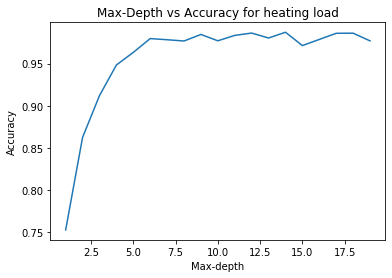

maximum accuracy is 0.9871652105134492 for split with 14


In [324]:
#By changing the max_depth
acu11 = []
dep1 =[]
for i in range(1,20):

    reg_dt11 = RFR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X1_train,y1_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X1_test)
    dep1.append(i)
    acu11.append(r2(y1_test, y11_pred))
plt.plot(dep1,acu11)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu11)
index = acu11.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep1[index]}")

In [325]:
Reg_heat_RFR = RFR(max_depth = dep1[index])
Reg_heat_RFR.fit(X1_train,y1_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

###### For cooling data

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

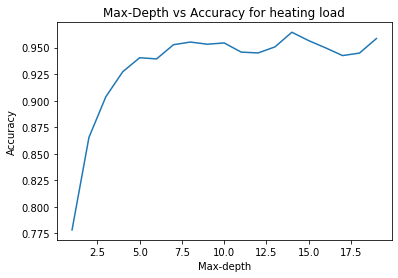

maximum accuracy is 0.9645332423022134 for split with 14


In [326]:
#By changing the max_depth
acu21 = []
dep2 =[]
for i in range(1,20):

    reg_dt11 = RFR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X2_train,y2_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X2_test)
    dep2.append(i)
    acu21.append(r2(y2_test, y11_pred))
plt.plot(dep2,acu21)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu21)
index = acu21.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep2[index]}")

In [327]:
Reg_cool_RFR = RFR(max_depth = dep2[index])
Reg_cool_RFR.fit(X2_train,y2_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

###### Accuracy for both

In [328]:
print(f'Accuracy for heating data model is {Reg_heat_RFR.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_RFR.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.9803855760870019
Accuracy for cooling data model is 0.9557890181983442


###### RMSE value

In [329]:
Y1_predict = Reg_heat_RFR.predict(X1_test)
Y2_predict = Reg_cool_RFR.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 1.47171590250673
Cooling RMSE: 2.039188528672368


###### r2_score

In [330]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.9803855760870019
Cooling r2_score: 0.9557890181983442
